In [2]:
if __name__=="__main__":
	import sys
	sys.path.append('/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/Scripts')
	
from SMT_Analysis_BP.databases.trajectory_analysis_script import *
from scipy.interpolate import griddata
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from scipy.stats import gaussian_kde
import pandas as pd
import os
import datetime
import numpy as np
from SMT_Analysis_BP.helpers.analysisFunctions.MSD_Utils import *
from SMT_Analysis_BP.helpers.ioModule.plotting_functions import *
from SMT_Analysis_BP.helpers.ioModule.import_functions import *
from SMT_Analysis_BP.helpers.analysisFunctions.Analysis_functions import *
from SMT_Analysis_BP.helpers.misc.diff_mw import *
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
from SMT_Analysis_BP.Random.scalebars import *
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from scipy import stats, ndimage,io
import json
import matplotlib.gridspec as gs
import csv  
from sklearn.cluster import OPTICS
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')  
from sklearn.cluster import DBSCAN
from cgitb import small
import SMT_Analysis_BP.helpers.analysisFunctions.smallestenclosingcircle as smallestenclosingcircle
import math
import SMT_Analysis_BP.helpers.misc.guassian_fit as gaussian_fit
import SMT_Analysis_BP.helpers.simulations.fbm_utility as fbm_utility
import SMT_Analysis_BP.helpers.simulations.simulate_foci as simulate_foci
import SMT_Analysis_BP.helpers.simulations.simulate_cells as simulate_cells
import SMT_Analysis_BP.helpers.ioModule.SMT_converters as smt
import matplotlib.patches as mpatches
import pickle
import SMT_Analysis_BP.Parameter_Store.global_params as param_store
globals = param_store.PIXELSIZES
from warnings import filterwarnings
filterwarnings('ignore',module="DeprecationWarning")
#ignore deprecated warnings
#ignore stacklevel=2 warnings

/var/folders/_t/qlzp5l894v16vmr8m_81x5x80000gn/T/ipykernel_2543/2484650135.py:40: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [3]:
def perform_run_analysis_bulk(path_keyword_dict:dict,**kwargs)->list:
    '''
    We will do the run analysis in bulk for a set of data which are repeats of a condition

    Parameters:
    -----------
    path_keyword_dict:dict
        A dictionary of the form {cd:{t_string:_,unique_name:_}}
        CD: is the condition directory
        t_string: is the string which if of internal use and signifies the file naming convention
        unique_name: is the unique name of the condition
    **kwargs:
        Keyword arguments which are passed to the run_analysis function
        TODO update this to be more specific

    Returns:
    --------
    list
        A list of the results of the run_analysis function for each condition.
        Each index is a realization of the trajectory_analysis_script.run_analysis class
    '''
    for data_type,data in path_keyword_dict.items():
        for cd,names in data.items():
            obj= run_analysis(cd,names.get("t_string"),unique_name=names.get("name"))
            obj.read_parameters(minimum_percent_per_drop_in = 0.5, 
                                t_len_u = 100, 
                                t_len_l = 1, 
                                minimum_tracks_per_drop = 3,
                                cluster_t_len_l=100)
            
            obj.get_blob_parameters(threshold=1e-4,
                                    overlap=0,
                                    detection_name='bp',
                                    min_sigma=1/np.sqrt(2),
                                    max_sigma=2.5/np.sqrt(2),
                                    num_sigma=100,
                                    median = False)

            obj.get_fitting_parameters(kwargs={"mask_size":3,
                                                "plot_fit":False,
                                                "fitting_image":"LAP",
                                                "radius_func":np.mean,#identity,
                                                "residual_func":residuals_gaus2d,
                                                "sigma_range":0.5,
                                                "centroid_range":0.5,
                                                "height_range":2})
            obj.type_of_blob ="Scale"
            obj.a_file_style = "new"
            obj.overwrite_cell_localizations = True
            obj.run_flow(masked_movies=True)
                

In [4]:
path_MG16655_controls = {"MG16655": {
    "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min":{
        "t_string":"MG16655_1_PFA_30_min",
        "name":"MG16655_1_P_30_min"},
    "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min":{
        "t_string":"MG16655_4_PFA_30_min",
        "name":"MG16655_4_P_30_min"},
    "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230926/MG16655_3_P_glyaxol_30_min":{
        "t_string":"MG16655_3_P_glyaxol_30min",
        "name":"MG16655_3_P_glyaxol_30_min"},
    "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230926/MG16655_24_04_PFA_Glu_30_min":{
        "t_string":"MG16655_24_04_P_PFA_glu_30min",
        "name":"MG16655_24_04_PFA_Glu_30_min"},
    "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230920/MG16655_WT_Live":{
        "t_string":"MG16655_Live",
        "name":"MG16655_WT_Live"},
    "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230926/MG16655_100ugml_rif_5min_Live":{
        "t_string":"MG_rif_100ugml_5_min_live",
        "name":"MG16655_100ugml_rif_5min_Live"},
    "/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230926/MG16655_hex5_5min_Live":{
        "t_string":"MG_hex5percent_5_min_live",
        "name":"MG16655_hex5_5min_Live"}
    }
}

perform_run_analysis_bulk(path_MG16655_controls)



All files in the dataset:
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Analysis_new/MG16655_1_PFA_30_min_1_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Analysis_new/MG16655_1_PFA_30_min_2_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Analysis_new/MG16655_1_PFA_30_min_3_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Analysis_new/MG16655_1_PFA_30_min_4_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Analysis_new/MG16655_1_PFA_30_min_5_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Analysis

/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))


seg_files ['/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/1_MG16655_1_PFA_30_min_2_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/2_MG16655_1_PFA_30_min_2_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/3_MG16655_1_PFA_30_min_2_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/4_MG16655_1_PFA_30_min_2_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/5_MG16655_1_PFA_30_min_2_seg.tif']
drop_files []


/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))


seg_files ['/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/1_MG16655_1_PFA_30_min_3_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/2_MG16655_1_PFA_30_min_3_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/3_MG16655_1_PFA_30_min_3_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/4_MG16655_1_PFA_30_min_3_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/5_MG16655_1_PFA_30_min_3_seg.tif']
drop_files []


/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))


seg_files ['/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/1_MG16655_1_PFA_30_min_4_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/2_MG16655_1_PFA_30_min_4_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/3_MG16655_1_PFA_30_min_4_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/4_MG16655_1_PFA_30_min_4_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/5_MG16655_1_PFA_30_min_4_seg.tif']
drop_files []


/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))


seg_files ['/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/1_MG16655_1_PFA_30_min_5_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/2_MG16655_1_PFA_30_min_5_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/3_MG16655_1_PFA_30_min_5_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/4_MG16655_1_PFA_30_min_5_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/5_MG16655_1_PFA_30_min_5_seg.tif']
drop_files []


/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))


seg_files ['/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/1_MG16655_1_PFA_30_min_6_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/2_MG16655_1_PFA_30_min_6_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/3_MG16655_1_PFA_30_min_6_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/4_MG16655_1_PFA_30_min_6_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/5_MG16655_1_PFA_30_min_6_seg.tif']
drop_files []


/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))


seg_files ['/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/1_MG16655_1_PFA_30_min_7_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/2_MG16655_1_PFA_30_min_7_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/3_MG16655_1_PFA_30_min_7_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/4_MG16655_1_PFA_30_min_7_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/5_MG16655_1_PFA_30_min_7_seg.tif']
drop_files []


/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))


seg_files ['/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/1_MG16655_1_PFA_30_min_8_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/2_MG16655_1_PFA_30_min_8_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/3_MG16655_1_PFA_30_min_8_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/4_MG16655_1_PFA_30_min_8_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/5_MG16655_1_PFA_30_min_8_seg.tif']
drop_files []


/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))


seg_files ['/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/1_MG16655_1_PFA_30_min_9_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/2_MG16655_1_PFA_30_min_9_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/3_MG16655_1_PFA_30_min_9_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/4_MG16655_1_PFA_30_min_9_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/5_MG16655_1_PFA_30_min_9_seg.tif']
drop_files []


/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))


seg_files ['/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/1_MG16655_1_PFA_30_min_10_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/2_MG16655_1_PFA_30_min_10_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/3_MG16655_1_PFA_30_min_10_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/4_MG16655_1_PFA_30_min_10_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/5_MG16655_1_PFA_30_min_10_seg.tif']
drop_files []


/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))


seg_files ['/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/1_MG16655_1_PFA_30_min_11_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/2_MG16655_1_PFA_30_min_11_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/3_MG16655_1_PFA_30_min_11_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/4_MG16655_1_PFA_30_min_11_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/5_MG16655_1_PFA_30_min_11_seg.tif']
drop_files []


/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))


seg_files ['/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/1_MG16655_1_PFA_30_min_12_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/2_MG16655_1_PFA_30_min_12_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/3_MG16655_1_PFA_30_min_12_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/4_MG16655_1_PFA_30_min_12_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Segmented_mean/5_MG16655_1_PFA_30_min_12_seg.tif']
drop_files []


/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


All files in the dataset:
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Analysis_new/MG16655_4_PFA_30_min_1_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Analysis_new/MG16655_4_PFA_30_min_2_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Analysis_new/MG16655_4_PFA_30_min_3_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Analysis_new/MG16655_4_PFA_30_min_4_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Analysis_new/MG16655_4_PFA_30_min_5_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Analysis

/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))


seg_files ['/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/1_MG16655_4_PFA_30_min_2_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/2_MG16655_4_PFA_30_min_2_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/3_MG16655_4_PFA_30_min_2_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/4_MG16655_4_PFA_30_min_2_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/5_MG16655_4_PFA_30_min_2_seg.tif']
drop_files []


/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))


seg_files ['/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/1_MG16655_4_PFA_30_min_3_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/2_MG16655_4_PFA_30_min_3_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/3_MG16655_4_PFA_30_min_3_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/4_MG16655_4_PFA_30_min_3_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/5_MG16655_4_PFA_30_min_3_seg.tif']
drop_files []


/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))


seg_files ['/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/1_MG16655_4_PFA_30_min_4_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/2_MG16655_4_PFA_30_min_4_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/3_MG16655_4_PFA_30_min_4_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/4_MG16655_4_PFA_30_min_4_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/5_MG16655_4_PFA_30_min_4_seg.tif']
drop_files []


/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))


seg_files ['/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/1_MG16655_4_PFA_30_min_5_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/2_MG16655_4_PFA_30_min_5_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/3_MG16655_4_PFA_30_min_5_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/4_MG16655_4_PFA_30_min_5_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/5_MG16655_4_PFA_30_min_5_seg.tif']
drop_files []


/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))


seg_files ['/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/1_MG16655_4_PFA_30_min_6_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/2_MG16655_4_PFA_30_min_6_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/3_MG16655_4_PFA_30_min_6_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/4_MG16655_4_PFA_30_min_6_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/5_MG16655_4_PFA_30_min_6_seg.tif']
drop_files []


/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))


seg_files ['/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/1_MG16655_4_PFA_30_min_7_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/2_MG16655_4_PFA_30_min_7_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/3_MG16655_4_PFA_30_min_7_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/4_MG16655_4_PFA_30_min_7_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/5_MG16655_4_PFA_30_min_7_seg.tif']
drop_files []


/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))


seg_files ['/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/1_MG16655_4_PFA_30_min_8_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/2_MG16655_4_PFA_30_min_8_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/3_MG16655_4_PFA_30_min_8_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/4_MG16655_4_PFA_30_min_8_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/5_MG16655_4_PFA_30_min_8_seg.tif']
drop_files []


/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))


seg_files ['/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/1_MG16655_4_PFA_30_min_9_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/2_MG16655_4_PFA_30_min_9_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/3_MG16655_4_PFA_30_min_9_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/4_MG16655_4_PFA_30_min_9_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/5_MG16655_4_PFA_30_min_9_seg.tif']
drop_files []


/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))


seg_files ['/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/1_MG16655_4_PFA_30_min_10_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/2_MG16655_4_PFA_30_min_10_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/3_MG16655_4_PFA_30_min_10_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/4_MG16655_4_PFA_30_min_10_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/5_MG16655_4_PFA_30_min_10_seg.tif']
drop_files []


/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))


seg_files ['/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/1_MG16655_4_PFA_30_min_11_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/2_MG16655_4_PFA_30_min_11_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/3_MG16655_4_PFA_30_min_11_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/4_MG16655_4_PFA_30_min_11_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min/Segmented_mean/5_MG16655_4_PFA_30_min_11_seg.tif']
drop_files []


/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


All files in the dataset:
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230926/MG16655_3_P_glyaxol_30_min/Analysis_new/MG16655_3_P_glyaxol_30min_1_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230926/MG16655_3_P_glyaxol_30_min/Analysis_new/MG16655_3_P_glyaxol_30min_2_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230926/MG16655_3_P_glyaxol_30_min/Analysis_new/MG16655_3_P_glyaxol_30min_3_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230926/MG16655_3_P_glyaxol_30_min/Analysis_new/MG16655_3_P_glyaxol_30min_4_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230926/MG16655_3_P_glyaxol_30_min/Analysis_new/MG16655_3_P_glyaxol_30min_5_seg.tif_spots.csv

max_tag: 182
min_tag: 182
seg_files ['/Users/baljyot/Docum

/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


All files in the dataset:
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230926/MG16655_24_04_PFA_Glu_30_min/Analysis_new/MG16655_24_04_P_PFA_glu_30min_1_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230926/MG16655_24_04_PFA_Glu_30_min/Analysis_new/MG16655_24_04_P_PFA_glu_30min_2_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230926/MG16655_24_04_PFA_Glu_30_min/Analysis_new/MG16655_24_04_P_PFA_glu_30min_3_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230926/MG16655_24_04_PFA_Glu_30_min/Analysis_new/MG16655_24_04_P_PFA_glu_30min_4_seg.tif_spots.csv

max_tag: 188
min_tag: 188
seg_files ['/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230926/MG16655_24_04_PFA_Glu_30_min/Segmented_mean/1_MG16655_24_04_P_PFA_glu_30min_1_seg.

/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


All files in the dataset:
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230920/MG16655_WT_Live/Analysis_new/MG16655_Live_1_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230920/MG16655_WT_Live/Analysis_new/MG16655_Live_2_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230920/MG16655_WT_Live/Analysis_new/MG16655_Live_3_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230920/MG16655_WT_Live/Analysis_new/MG16655_Live_4_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230920/MG16655_WT_Live/Analysis_new/MG16655_Live_5_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230920/MG16655_WT_Live/Analysis_new/MG16655_Live_6_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Balj

/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))


seg_files ['/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230920/MG16655_WT_Live/Segmented_mean/1_MG16655_Live_5_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230920/MG16655_WT_Live/Segmented_mean/2_MG16655_Live_5_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230920/MG16655_WT_Live/Segmented_mean/3_MG16655_Live_5_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230920/MG16655_WT_Live/Segmented_mean/4_MG16655_Live_5_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230920/MG16655_WT_Live/Segmented_mean/5_MG16655_Live_5_seg.tif']
drop_files []


/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))


seg_files ['/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230920/MG16655_WT_Live/Segmented_mean/1_MG16655_Live_6_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230920/MG16655_WT_Live/Segmented_mean/2_MG16655_Live_6_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230920/MG16655_WT_Live/Segmented_mean/3_MG16655_Live_6_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230920/MG16655_WT_Live/Segmented_mean/4_MG16655_Live_6_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230920/MG16655_WT_Live/Segmented_mean/5_MG16655_Live_6_seg.tif']
drop_files []


/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))


seg_files ['/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230920/MG16655_WT_Live/Segmented_mean/1_MG16655_Live_7_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230920/MG16655_WT_Live/Segmented_mean/2_MG16655_Live_7_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230920/MG16655_WT_Live/Segmented_mean/3_MG16655_Live_7_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230920/MG16655_WT_Live/Segmented_mean/4_MG16655_Live_7_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230920/MG16655_WT_Live/Segmented_mean/5_MG16655_Live_7_seg.tif']
drop_files []


/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:810: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/lmfit/minimizer.py:817: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))


seg_files ['/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230920/MG16655_WT_Live/Segmented_mean/1_MG16655_Live_8_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230920/MG16655_WT_Live/Segmented_mean/2_MG16655_Live_8_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230920/MG16655_WT_Live/Segmented_mean/3_MG16655_Live_8_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230920/MG16655_WT_Live/Segmented_mean/4_MG16655_Live_8_seg.tif', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230920/MG16655_WT_Live/Segmented_mean/5_MG16655_Live_8_seg.tif']
drop_files []


/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


All files in the dataset:
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230926/MG16655_100ugml_rif_5min_Live/Analysis_new/MG_rif_100ugml_5_min_live_1_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230926/MG16655_100ugml_rif_5min_Live/Analysis_new/MG_rif_100ugml_5_min_live_2_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230926/MG16655_100ugml_rif_5min_Live/Analysis_new/MG_rif_100ugml_5_min_live_3_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230926/MG16655_100ugml_rif_5min_Live/Analysis_new/MG_rif_100ugml_5_min_live_4_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230926/MG16655_100ugml_rif_5min_Live/Analysis_new/MG_rif_100ugml_5_min_live_5_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG

/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


All files in the dataset:
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230926/MG16655_hex5_5min_Live/Analysis_new/MG_hex5percent_5_min_live_1_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230926/MG16655_hex5_5min_Live/Analysis_new/MG_hex5percent_5_min_live_2_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230926/MG16655_hex5_5min_Live/Analysis_new/MG_hex5percent_5_min_live_3_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230926/MG16655_hex5_5min_Live/Analysis_new/MG_hex5percent_5_min_live_4_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230926/MG16655_hex5_5min_Live/Analysis_new/MG_hex5percent_5_min_live_5_seg.tif_spots.csv
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230926/MG1665

/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/baljyot/opt/anaconda3/envs/SMT_env_BP/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [5]:
print(path_MG16655_controls)

{'MG16655': {'/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min': {'t_string': 'MG16655_1_PFA_30_min', 'name': 'MG16655_1_P_30_min'}, '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min': {'t_string': 'MG16655_4_PFA_30_min', 'name': 'MG16655_4_P_30_min'}, '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230926/MG16655_3_P_glyaxol_30_min': {'t_string': 'MG16655_3_P_glyaxol_30min', 'name': 'MG16655_3_P_glyaxol_30_min'}, '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230926/MG16655_24_04_PFA_Glu_30_min': {'t_string': 'MG16655_24_04_P_PFA_glu_30min', 'name': 'MG16655_24_04_PFA_Glu_30_min'}, '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Live/20230920/MG16655_WT_Live': {'t_string': 'MG16655_Live', 'name': 'MG16655_WT_Live'}, '/Users/baljyot/Docu

In [6]:
#load the localization data and read the number of entries per cell

localization_number = {}
loc_frame_numbers = {}


for i,k in path_MG16655_controls.items():
    for j,_ in k.items():
        print(j)
        localization_number[j] = {}
        loc_frame_numbers[j] = {}
        localization_paths = glob.glob(str(os.path.join(j,"Movies")+"/*/*/localizations.csv"),recursive=True)
        print(localization_paths)
        localization_number[j] = {"cells":len(localization_paths),"Number_Loc":[]}
        loc_frame_numbers[j] = {cell:{} for cell in range(1,len(localization_paths)+1)}
        for p in localization_paths:
            try:
                loc = pd.read_csv(p,header=0)
                #find the length of the whole dataframe
                localization_number[j]["Number_Loc"].append(len(loc))
                #get the column with "FRAME"
                frame = loc["FRAME"]
                #convert to a list and dtype int
                frame = frame.tolist()
                frame = [int(i) for i in frame]
                #for each instance of a frame number in this list add 1 to the dictionary
                for f in frame:
                    if f not in loc_frame_numbers[j][localization_paths.index(p)+1].keys():
                        loc_frame_numbers[j][localization_paths.index(p)+1][f] = 0
                    loc_frame_numbers[j][localization_paths.index(p)+1][f] += 1
            except:
                loc=0
            



/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min
['/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Movies/Movie_6/Cell_1/localizations.csv', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Movies/Movie_6/Cell_2/localizations.csv', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Movies/Movie_6/Cell_3/localizations.csv', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Movies/Movie_10/Cell_1/localizations.csv', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min/Movies/Movie_10/Cell_2/localizations.csv', '/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixati

In [7]:
#print the localization number in a pretty format

for k,v in localization_number.items():
    print(k)
    print("Number of cells: {}".format(v["cells"]))
    print("Number of localizations per cell: {}".format(v["Number_Loc"]))
    print("Mean number of localizations per cell: {}".format(np.mean(v["Number_Loc"])))
    
    

/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_1_P_30_min
Number of cells: 20
Number of localizations per cell: [0, 14, 3, 2, 2, 2, 2, 60, 0, 4, 628, 0, 4, 3, 12, 0, 0, 112, 0, 0]
Mean number of localizations per cell: 42.4
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230918/MG16655_4_P_30_min
Number of cells: 22
Number of localizations per cell: [0, 2, 6, 2054, 1275, 747, 2, 20, 2, 2, 2, 6, 5, 104, 17, 7, 17, 11, 4, 2, 26, 6]
Mean number of localizations per cell: 196.22727272727272
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fixation/20230926/MG16655_3_P_glyaxol_30_min
Number of cells: 20
Number of localizations per cell: [259, 1345, 1432, 518, 358, 433, 17, 36, 928, 822, 147, 2247, 292, 185, 346, 3477, 190, 423, 80, 324]
Mean number of localizations per cell: 692.95
/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/DATA/MG16655_Controls/Fix

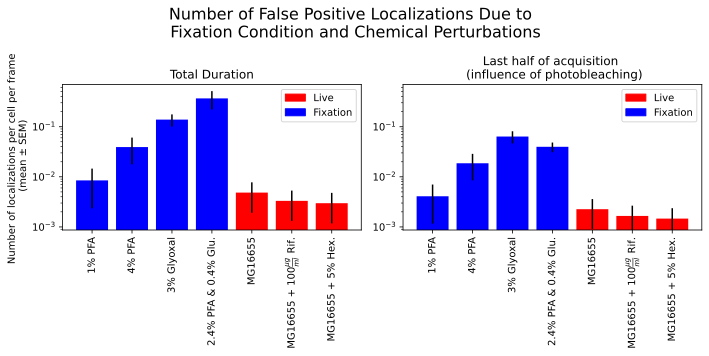

In [15]:
#plot this in a bar chart to show the number of localizations per cell for each condition on the x and the # of localizations on the y
#plot the number of localizations per cell for each condition
#pretty x labels
#write ug/ml as $\frac{\mu g}{ml}$

pretty_names = ["1% PFA","4% PFA","3% Glyoxal","2.4% PFA & 0.4% Glu.","MG16655",r"MG16655 + $100 \frac{\mu g}{ml}$ Rif.","MG16655 + 5% Hex."]
frames_per_conditions = [5000,5000,5000,5000,100,500,500]
#color the first three as blue and the last three as red and label them as fixation and live
#plot the localizations and also their standard deviation
fig= plt.figure(figsize=(10,5))
gs = fig.add_gridspec(1,2)
ax = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

x = np.arange(7)
y_total = []
yerr_total = []
y_last = []
yerr_last = []
for k,v in localization_number.items():
    y_total.append(np.mean(v["Number_Loc"])/frames_per_conditions[list(localization_number.keys()).index(k)])
    yerr_total.append(np.std(v["Number_Loc"])/frames_per_conditions[list(localization_number.keys()).index(k)]/np.sqrt(len(v["Number_Loc"])))
for k,v in loc_frame_numbers.items():
    last_500 = []
    for cell in v.keys():
        last_500.append(np.sum(list(v[cell].values())[-int(len(list(v[cell].values()))/2):]))
    y_last.append(np.mean(last_500)/frames_per_conditions[list(loc_frame_numbers.keys()).index(k)])
    yerr_last.append(np.std(last_500)/np.sqrt(len(last_500))/frames_per_conditions[list(loc_frame_numbers.keys()).index(k)])

y_total = np.array(y_total)
yerr_total = np.array(yerr_total)
y_last = np.array(y_last)
yerr_last = np.array(yerr_last)

ax.bar(x,y_total,yerr=yerr_total,color=["blue","blue","blue","blue","red","red","red"])
ax.set_xticks(x)
ax.set_xticklabels(pretty_names,rotation=90)
ax.set_ylabel("Number of localizations per cell per frame \n (mean $\pm$ SEM)")
ax.set_title("Total Duration")
#put a label with red = Live and blue = Fixation
red_patch = mpatches.Patch(color='red', label='Live')
blue_patch = mpatches.Patch(color='blue', label='Fixation')
ax.legend(handles=[red_patch,blue_patch])
ax.set_yscale("log")

#Make the y axis of the second plot the same as the first
ax1.set_ylim(ax.get_ylim())
ax1.bar(x,y_last,yerr=yerr_last,color=["blue","blue","blue","blue","red","red","red"])
ax1.set_xticks(x)
ax1.set_xticklabels(pretty_names,rotation=90)
ax1.set_title("Last half of acquisition \n (influence of photobleaching)")
#put a label with red = Live and blue = Fixation
red_patch = mpatches.Patch(color='red', label='Live')
blue_patch = mpatches.Patch(color='blue', label='Fixation')
ax1.legend(handles=[red_patch,blue_patch])
ax1.set_yscale("log")

#make a fig title
fig.suptitle("Number of False Positive Localizations Due to \n Fixation Condition and Chemical Perturbations",fontsize=16)
plt.tight_layout()
plt.show()


